In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [2]:
#importing the dataset

data = pd.read_csv("heart.csv")
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
# defining feature matrix(X) and response vector(y) 
X = data.iloc[:, 0:13]
y = data["target"]

# splitting X and y into training and testing sets 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=10) 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [4]:
X_train.shape

(212, 13)

In [5]:
# Elbow method to get the optimum number of clusters
from sklearn.cluster import KMeans
error = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X_train)
    error.append(kmeans.inertia_)

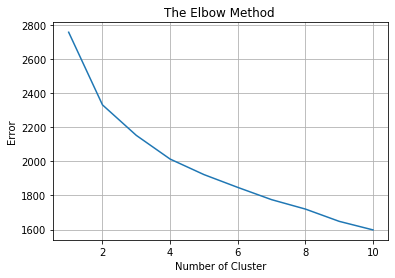

In [6]:
#plotting number of clusters vs WCSS
plt.plot(range(1,11),error)
plt.grid()
plt.title("The Elbow Method ")
plt.xlabel("Number of Cluster")
plt.ylabel("Error")
plt.show()

In [41]:
#Implementing K-means after choosing optimum k
kmeans = KMeans(n_clusters= 2, 
                init = "k-means++" , 
                max_iter= 500 , 
                n_init= 10 , 
                random_state= 0)
y_kmeans_GPU = kmeans.fit_predict(X_train)

In [42]:
#Implementing PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
X_GPU_PCA = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

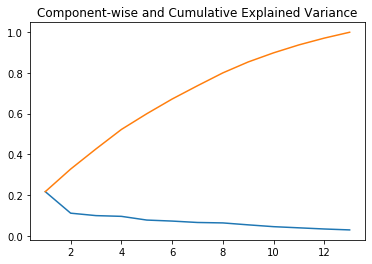

In [54]:
plt.plot(range(1,14), explained_variance)
plt.plot(range(1,14), np.cumsum(explained_variance))
plt.title("Component-wise and Cumulative Explained Variance")

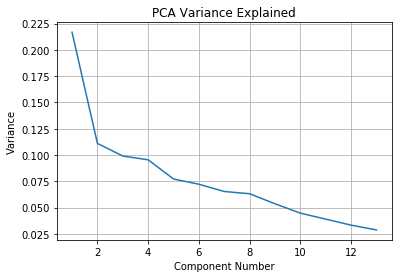

In [43]:
plt.plot(range(1,14),explained_variance)
plt.title("PCA Variance Explained")
plt.xlabel("Component Number")
plt.ylabel("Variance")
plt.grid()
plt.show()

In [13]:
#Implementing PCA with obtained number of components
pca = PCA(n_components= 1)
X_GPU_PCA = pca.fit_transform(X_train)

In [14]:
#Finding the number of clusters
error_pca = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X_GPU_PCA)
    error_pca.append(kmeans.inertia_)

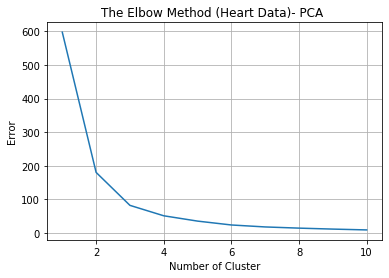

In [55]:
plt.plot(range(1,11),error_pca)
plt.title("The Elbow Method (Heart Data)- PCA ")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("Error")
plt.show()

In [16]:
from sklearn.mixture import GaussianMixture

y=np.array(y_train) 
y=y.astype(float)
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(X_train)
em_pred = em.predict(X_train)
em_probs = em.predict_proba(X_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))

[[ 49  39]
 [ 17 107]]
0.7358490566037735


Text(0.5, 1.0, 'Expectation Maximization - Heart Data')

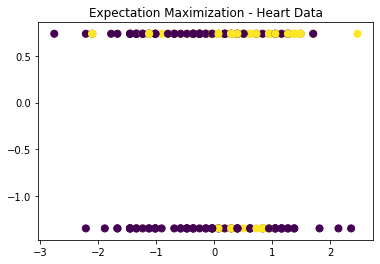

In [56]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization - Heart Data')

In [18]:
#Implementing ICA
from sklearn.decomposition import FastICA

ica = FastICA(tol = 1e-2, max_iter = 1000, n_components =1)
X_GPU_ICA = ica.fit_transform(X_train)

error_ICA = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X_GPU_ICA)
    error_ICA.append(kmeans.inertia_)

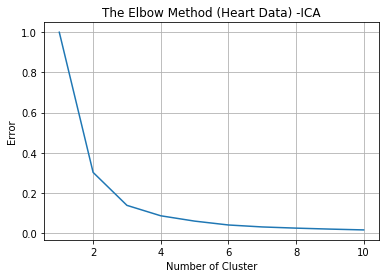

In [57]:
plt.plot(range(1,11),error_ICA)
plt.title("The Elbow Method (Heart Data) -ICA")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("Error")
plt.show()

In [20]:
#Implementing Random Projection

from sklearn.random_projection import SparseRandomProjection
srp = SparseRandomProjection(eps = 0.1, n_components = 1)
X_GPU_RP = srp.fit_transform(X_train)

error_ra = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X_GPU_RP)
    error_ra.append(kmeans.inertia_)

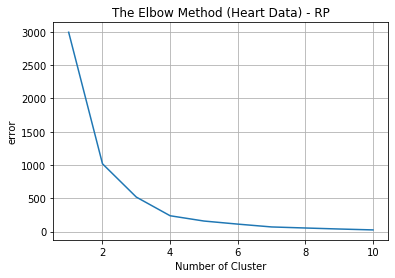

In [58]:
plt.plot(range(1,11),error_ra)
plt.title("The Elbow Method (Heart Data) - RP")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("error")
plt.show()

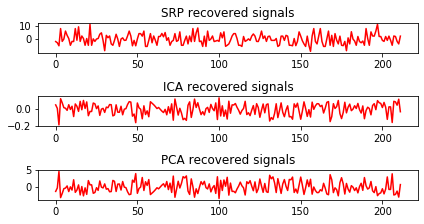

In [22]:
plt.figure()
models = [ X_GPU_RP,X_GPU_ICA, X_GPU_PCA]
names = ['SRP recovered signals',
        'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange', 'brown', 'green', 'violet']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [23]:
#Implementing feature selection

from sklearn.feature_selection import RFECV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=6)
rfecv = RFECV(estimator=dt, step=1, cv=5, n_jobs=-1,
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.ranking_)

Optimal number of features : 10
[1 1 1 1 1 4 1 1 1 3 1 1 2]


In [24]:
X_GPU_FE = X_train[:,(0,1,2,3,4,6,7,8,10,11)]

error_FS = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i , 
                    init = "k-means++" , 
                    max_iter= 500 , 
                    n_init= 10 , 
                    random_state= 0 )
    kmeans.fit(X_GPU_FE)
    error_FS.append(kmeans.inertia_)

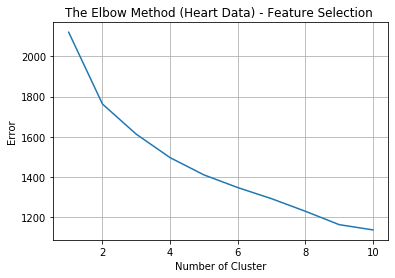

In [59]:
plt.plot(range(1,11),error_FS)
plt.title("The Elbow Method (Heart Data) - Feature Selection ")
plt.grid()
plt.xlabel("Number of Cluster")
plt.ylabel("Error")
plt.show()

In [30]:
#Implementing Neural Nets
from sklearn.neural_network import MLPClassifier

X_train_E ,X_test_E, y_train_E , y_test_E = train_test_split(X_train, y, test_size = 0.25 , random_state = 0)

### Original ANN 
ANN_class_Energy = MLPClassifier(hidden_layer_sizes= (12,8,8,8),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

ANN_class_Energy.fit(X_train_E, y_train_E.ravel())


C:\Users\bhava\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [31]:
### predicting the test set result
y_pred_E = ANN_class_Energy.predict(X_test_E)
y_expect_E = y_test_E

### Finding the accuracy
Result_E = accuracy_score(y_expect_E , y_pred_E)
print(Result_E)


0.7924528301886793


In [44]:
### ANN with PCA : 
X_train_E ,X_test_E, y_train_E , y_test_E = train_test_split(X_GPU_PCA, y, test_size = 0.25 , random_state = 0)

ANN_class_Energy = MLPClassifier(hidden_layer_sizes= (12,8,8,8),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

ANN_class_Energy.fit(X_train_E, y_train_E.ravel())

C:\Users\bhava\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [45]:
### predicting the test set result
y_pred_E = ANN_class_Energy.predict(X_test_E)
y_expect_E = y_test_E

### Finding the accuracy
Result_E = accuracy_score(y_expect_E , y_pred_E)
print("Accuracy_PCA:",Result_E)

Accuracy_PCA: 0.7358490566037735


In [46]:
### ANN with Randomized Projections : 
X_train_E ,X_test_E, y_train_E , y_test_E = train_test_split(X_GPU_RP, y, test_size = 0.25 , random_state = 0)

ANN_class_Energy = MLPClassifier(hidden_layer_sizes= (12,8,8,8),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

ANN_class_Energy.fit(X_train_E, y_train_E.ravel())

C:\Users\bhava\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [47]:
### predicting the test set result
y_pred_E = ANN_class_Energy.predict(X_test_E)
y_expect_E = y_test_E

### Finding the accuracy
Result_E = accuracy_score(y_expect_E , y_pred_E)
print("Accuracy_RP:",Result_E)

Accuracy_RP: 0.7924528301886793


In [48]:
### ANN with Feature Selection : 
X_train_E ,X_test_E, y_train_E , y_test_E = train_test_split(X_GPU_FE, y, test_size = 0.25 , random_state = 0)

ANN_class_Energy = MLPClassifier(hidden_layer_sizes= (12,8,8,8),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

ANN_class_Energy.fit(X_train_E, y_train_E.ravel())

C:\Users\bhava\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [49]:
### predicting the test set result
y_pred_E = ANN_class_Energy.predict(X_test_E)
y_expect_E = y_test_E

### Finding the accuracy
Result_E = accuracy_score(y_expect_E , y_pred_E)
print("Accuracy_FE:",Result_E)

Accuracy_FE: 0.7735849056603774


In [50]:
### ANN with ICA : 
X_train_E ,X_test_E, y_train_E , y_test_E = train_test_split(X_GPU_ICA, y, test_size = 0.25 , random_state = 0)

ANN_class_Energy = MLPClassifier(hidden_layer_sizes= (12,8,8,8),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

ANN_class_Energy.fit(X_train_E, y_train_E.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [51]:
### predicting the test set result
y_pred_E = ANN_class_Energy.predict(X_test_E)
y_expect_E = y_test_E

### Finding the accuracy
Result_E = accuracy_score(y_expect_E , y_pred_E)
print("Accuracy_ICA:",Result_E)

Accuracy_ICA: 0.7547169811320755


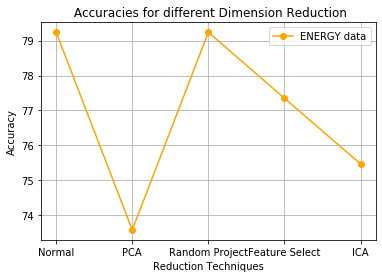

In [53]:
############## Plotting the accuracies 

accuracies_energy = [79.24 , 73.58 , 79.24 , 77.35 , 75.47]
accuracies_type = ['Normal','PCA','Random Project','Feature Select','ICA']
plt.plot(accuracies_type , accuracies_energy , marker='o',markersize=6,color='orange',label='ENERGY data')
plt.title(" Accuracies for different Dimension Reduction")
plt.xlabel("Reduction Techniques")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()